In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os, fnmatch
import numpy as np
%matplotlib inline

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [2]:
basedirpath = r'C:/Mayank/Amlai'

In [3]:
print(os.listdir(basedirpath))

['S2B_MSIL2A_20230227T050749_N0509_R019_T44QNL_20230227T075515', 'S2B_MSIL2A_20230415T045659_N0509_R119_T44QNL_20230415T072612', 'S2B_MSIL2A_20230418T050659_N0509_R019_T44QNL_20230418T074740', 'S2B_MSIL2A_20230518T050659_N0509_R019_T44QNL_20230518T092654']


In [4]:
bandsearch = ['B02', 'B03', 'B04', 'B08']
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result
for searchtext in bandsearch:
    searchstring = '*_'+searchtext+'_10m.JP2'
#     print(searchstring)
    files_tif=find(searchstring, basedirpath)
    with rasterio.open(files_tif[0]) as src:
        meta = src.meta.copy()

# The merge function returns a single array and the affine transform info
    arr, out_trans = merge(files_tif)

    meta.update({
        "driver": "GTiff",
        "height": arr.shape[1],
        "width": arr.shape[2],
        "transform": out_trans
    })

# Write the mosaic raster to disk
    with rasterio.open(os.path.join(basedirpath, searchtext+'s2_.tif'), "w", **meta) as dest:
        dest.write(arr)

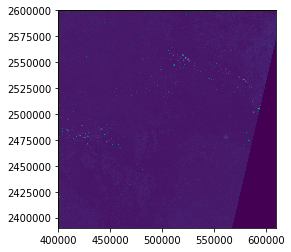

In [9]:
raster = rasterio.open(os.path.join(basedirpath, 'B02_.tif'))

# Plot band 1
show((raster, 1))

In [5]:
bands=[]
for filenames in glob.glob(os.path.join(basedirpath,"*.tif")):
    read_band=rasterio.open(filenames)
    bands.append(read_band.read(1, masked=True))

In [6]:
len(bands)

4

In [7]:
out_meta = read_band.meta.copy()
out_meta.update({"dtype":'float32',"count": 4,"nodata": np.nan})
print(out_meta)
out_img=os.path.join(basedirpath,"stacked_image.tif")
with rasterio.open(out_img, 'w', **out_meta) as dest:
    for band_nr, src in enumerate(bands, start=1):
        dest.write(src, band_nr)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 10980, 'height': 10980, 'count': 4, 'crs': CRS.from_epsg(32644), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 2600040.0)}
